# *Symptom2Disease data*

In [1]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')

# **Data Understanding & Exploration**

In [2]:
def explore_dataset(data, data_filename=None):
    """
    In explore_dataset function we are doing all the things that given below:
    - checking shape of dataset
    - checking column names that exist in dataset
    - checking null values 
    - checking overall information about dataset using info() method
    - checking dtypes of columns
    """
    print("="*100)
    print("\t\t\tEDA Dataset: {}".format(data_filename))
    print("="*100)
    
    print("Total Rows: {}".format(data.shape[0]))
    print("\nTotal Columns: {}".format(data.shape[1]))
    print("\nColumns: {}".format(data.columns.tolist()))
    print("\nTotal Null Values: {}".format(data.isnull().sum().sum()))
    print(data.isnull().sum())
    print(" ")
    print("\t\tOverall Information about Dataset\n")
    print(data.info())
    print(" ")
    print("\t\tDtype of all Columns\n")
    print(data.dtypes)

In [3]:
filename = 'Symptom2Disease.csv'
df = pd.read_csv(filename)

In [4]:
# lets check the information of dataset
explore_dataset(df,filename)

			EDA Dataset: Symptom2Disease.csv
Total Rows: 1200

Total Columns: 3

Columns: ['Unnamed: 0', 'label', 'text']

Total Null Values: 0
Unnamed: 0    0
label         0
text          0
dtype: int64
 
		Overall Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1200 non-null   int64 
 1   label       1200 non-null   object
 2   text        1200 non-null   object
dtypes: int64(1), object(2)
memory usage: 28.2+ KB
None
 
		Dtype of all Columns

Unnamed: 0     int64
label         object
text          object
dtype: object


In [5]:
df.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [6]:
df = df[['text', 'label']]
df.head()

,text,label
0,I have been experiencing a skin rash on my arm...,Psoriasis
1,"My skin has been peeling, especially on my kne...",Psoriasis
2,I have been experiencing joint pain in my fing...,Psoriasis
3,"There is a silver like dusting on my skin, esp...",Psoriasis
4,"My nails have small dents or pits in them, and...",Psoriasis


# **Data Cleaning & Analysis**

In [7]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
v = df['label'].value_counts().reset_index()
v

,index,label
0,Psoriasis,50
1,Varicose Veins,50
2,peptic ulcer disease,50
3,drug reaction,50
4,gastroesophageal reflux disease,50
5,allergy,50
6,urinary tract infection,50
7,Malaria,50
8,Jaundice,50
9,Cervical spondylosis,50


# **Data Visualization**

In [9]:
def categroy_distribution(data, col, top=None):
    print("\t\t{} Distribution".format(col))
    print()
    perc = round(data[col].value_counts(normalize=True)[:top]*100,2)

    dataCat = perc.to_frame().reset_index().rename(columns={'index':'Category',
                                                          col:f'{col}Percentage %'})
    print(tabulate(dataCat, headers = 'keys', tablefmt = 'psql'))
    plt.figure(figsize=(7,7))
    fig = sns.countplot(x=col, data=data, color="g", order=data[col].value_counts().iloc[:top].index)
    for p in fig.patches:
        fig.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+10), size=12)
    plt.xticks(rotation=90)
    plt.show()

		label Distribution

+----+---------------------------------+---------------------+
|    | Category                        |   labelPercentage % |
|----+---------------------------------+---------------------|
|  0 | Psoriasis                       |                4.17 |
|  1 | Varicose Veins                  |                4.17 |
|  2 | peptic ulcer disease            |                4.17 |
|  3 | drug reaction                   |                4.17 |
|  4 | gastroesophageal reflux disease |                4.17 |
|  5 | allergy                         |                4.17 |
|  6 | urinary tract infection         |                4.17 |
|  7 | Malaria                         |                4.17 |
|  8 | Jaundice                        |                4.17 |
|  9 | Cervical spondylosis            |                4.17 |
| 10 | Migraine                        |                4.17 |
| 11 | Hypertension                    |                4.17 |
| 12 | Bronchial Asthma          

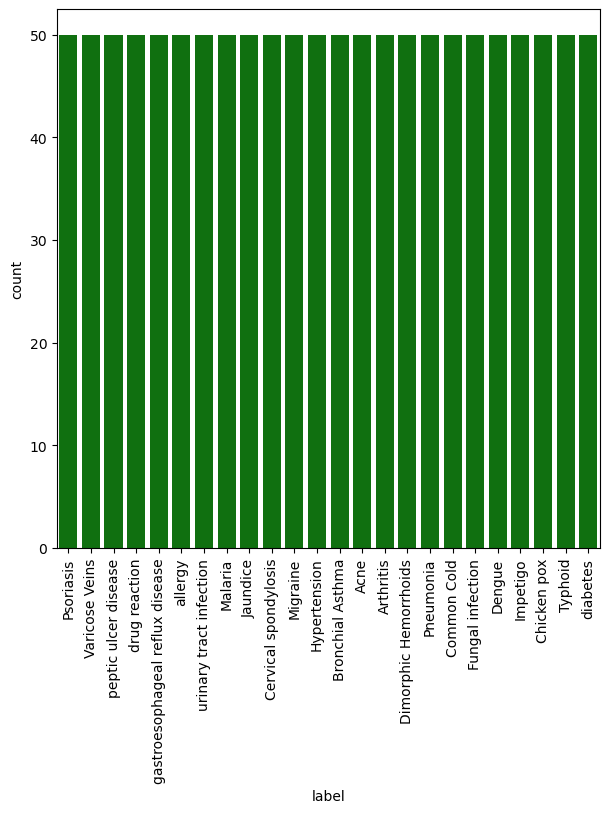

In [10]:
categroy_distribution(df, 'label')

		Distribution of Labels


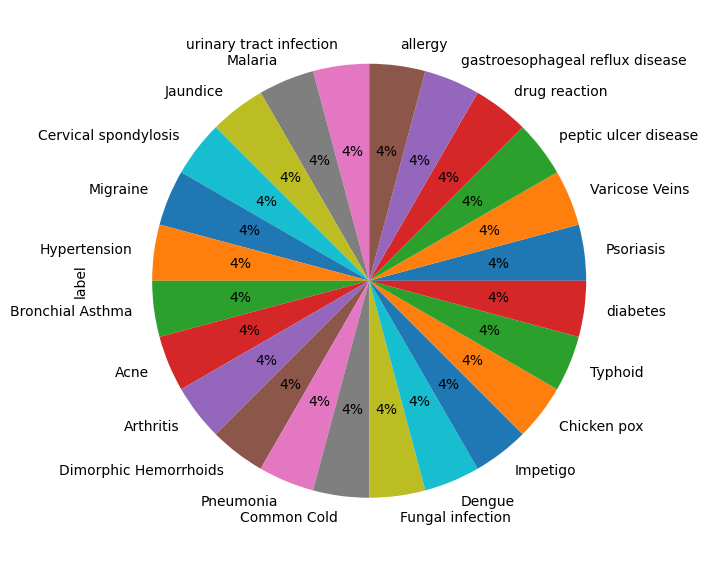

In [11]:
print("\t\tDistribution of Labels")
plt.figure(figsize=(7,8))
df['label'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

In [12]:
# lets try to check the length of each text of training dataset
df['text_len'] = df['text'].str.len()

In [13]:
df.head()

,text,label,text_len
0,I have been experiencing a skin rash on my arm...,Psoriasis,141
1,"My skin has been peeling, especially on my kne...",Psoriasis,138
2,I have been experiencing joint pain in my fing...,Psoriasis,148
3,"There is a silver like dusting on my skin, esp...",Psoriasis,164
4,"My nails have small dents or pits in them, and...",Psoriasis,140


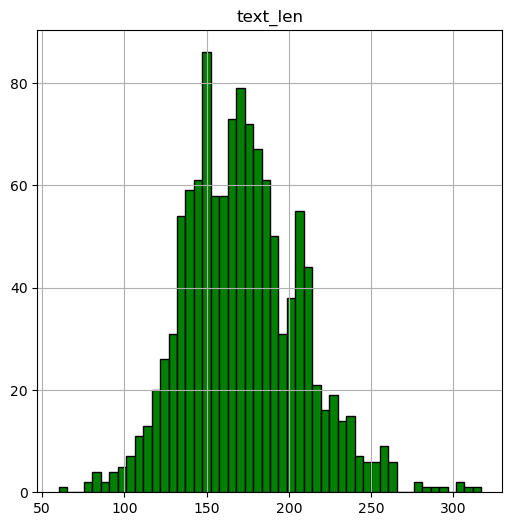

In [14]:
def plot_histogram(data):
    # Overall idea about distribution of data histogram 
    data.select_dtypes(include=[int, float]).hist(bins=50, figsize=(6,6), color = "g", edgecolor='black')
    plt.show()
    
plot_histogram(df)

# **Data Preprocessing**

In [15]:
# importing the NLP libraries that will be used for preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

from nltk.stem import WordNetLemmatizer, PorterStemmer

stemmer = PorterStemmer() #creating an instance of the class

stopwords.words("english")[:10] # <-- import the english stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\edara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\edara\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
def preprocess_text(text):
    """In preprocess_text function we will apply all the things that given below:
    - removing links
    - removing special characters
    - removing punctuations
    - removing numbers
    - removing stopwords
    - doing stemming
    - transforming in lowercase
    - removing excessive whitespaces
    """
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove punctuations in string
    text = re.sub(r'[^\w\s]', "", text) 
    
    # remove stopwords, doing stemming
    # 1. tokenize
    tokens = nltk.word_tokenize(text)
    # 2. check if stopword and stemming the word
    tokens = [stemmer.stem(w) for w in tokens if not w.lower() in stopwords.words("english") if len(w)>=3]
    # 3. join back together
    text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [17]:
# lets get the clean text of training dataset
df['cleaned_text'] = df['text'].apply(lambda x: preprocess_text(x))

In [18]:
df.head()

,text,label,text_len,cleaned_text
0,I have been experiencing a skin rash on my arm...,Psoriasis,141,experienc skin rash arm leg torso past week re...
1,"My skin has been peeling, especially on my kne...",Psoriasis,138,skin peel especi knee elbow scalp peel often a...
2,I have been experiencing joint pain in my fing...,Psoriasis,148,experienc joint pain finger wrist knee pain of...
3,"There is a silver like dusting on my skin, esp...",Psoriasis,164,silver like dust skin especi lower back scalp ...
4,"My nails have small dents or pits in them, and...",Psoriasis,140,nail small dent pit often feel inflammatori te...


In [19]:
a = df['label'].value_counts()

In [20]:
a.index

Index(['Psoriasis', 'Varicose Veins', 'peptic ulcer disease', 'drug reaction',
       'gastroesophageal reflux disease', 'allergy', 'urinary tract infection',
       'Malaria', 'Jaundice', 'Cervical spondylosis', 'Migraine',
       'Hypertension', 'Bronchial Asthma', 'Acne', 'Arthritis',
       'Dimorphic Hemorrhoids', 'Pneumonia', 'Common Cold', 'Fungal infection',
       'Dengue', 'Impetigo', 'Chicken pox', 'Typhoid', 'diabetes'],
      dtype='object')

In [21]:
dic = {'Psoriasis':0, 
       'Varicose Veins':1, 
       'peptic ulcer disease':2,
       'drug reaction':3,
       'gastroesophageal reflux disease':4, 
       'allergy':5, 
       'urinary tract infection':6,
       'Malaria':7,
       'Jaundice':8, 
       'Cervical spondylosis':9,
       'Migraine':10,
       'Hypertension':11,
       'Bronchial Asthma':12, 
       'Acne':13, 
       'Arthritis':14,
       'Dimorphic Hemorrhoids':15,
       'Pneumonia':16,
       'Common Cold':17,
       'Fungal infection':18,
       'Dengue':19,
       'Impetigo':20, 
       'Chicken pox':21,
       'Typhoid':22, 
       'diabetes':23}

In [22]:
# creating a dictionary
df['text_label'] = df['label'].map(dic)

In [23]:
df.head()

,text,label,text_len,cleaned_text,text_label
0,I have been experiencing a skin rash on my arm...,Psoriasis,141,experienc skin rash arm leg torso past week re...,0
1,"My skin has been peeling, especially on my kne...",Psoriasis,138,skin peel especi knee elbow scalp peel often a...,0
2,I have been experiencing joint pain in my fing...,Psoriasis,148,experienc joint pain finger wrist knee pain of...,0
3,"There is a silver like dusting on my skin, esp...",Psoriasis,164,silver like dust skin especi lower back scalp ...,0
4,"My nails have small dents or pits in them, and...",Psoriasis,140,nail small dent pit often feel inflammatori te...,0


In [24]:
# define a function for getting all words from the text
def returning_tokinize_list(df,column_name):
    df = df.reset_index(drop=True)  
    tokenize_list = [word_tokenize(df[column_name][i]) for i in range(df.shape[0])]
    final = [j for i in tokenize_list for j in i]
    return final     

In [25]:
# get the all words of text into list
tokenize_list_words= returning_tokinize_list(df, 'cleaned_text')

In [26]:
# function for words in dataframe format
def table_format(data_list,column_name):
    df_ = pd.DataFrame(data_list, columns = [column_name,'Frequency_distribution'])
    return tabulate(df_, headers = 'keys', tablefmt = 'psql')

# function for extracting the most common words in reviews text
def most_common_words(cleaned_col_name_list,common_words = 10):
    fdist = FreqDist(cleaned_col_name_list)
    most_common=fdist.most_common(common_words)
    return most_common

# draw a graph of word which are most common
def word_cloud(data):
    unique_string=(" ").join(data)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("wordCloud"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

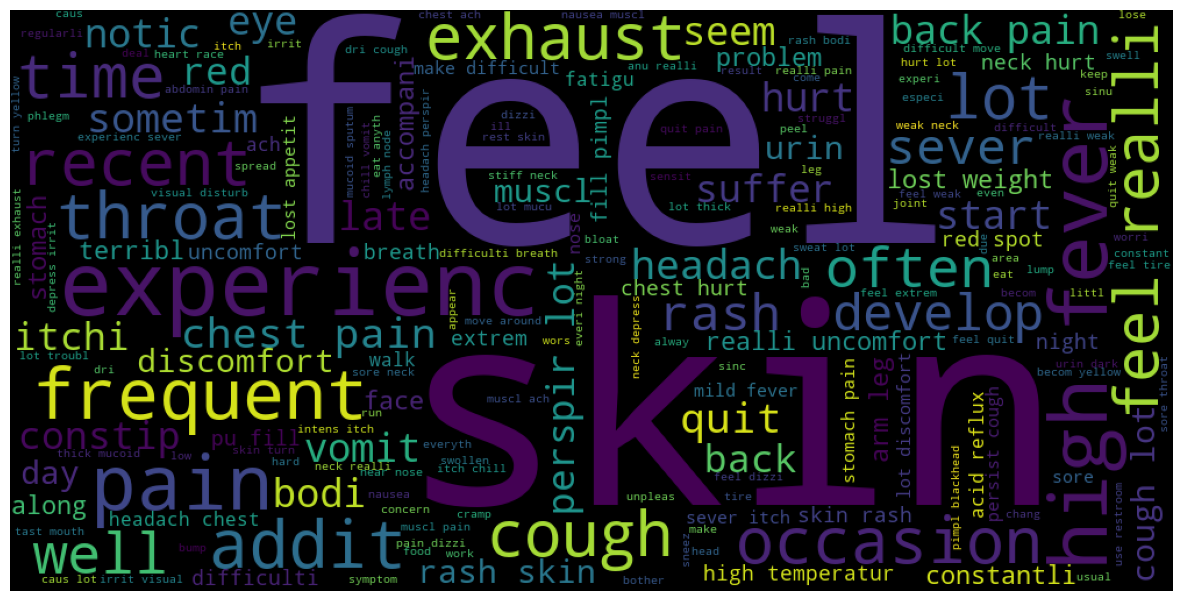

+----+-----------+--------------------------+
|    | word      |   Frequency_distribution |
|----+-----------+--------------------------|
|  0 | feel      |                      481 |
|  1 | pain      |                      419 |
|  2 | also      |                      418 |
|  3 | skin      |                      384 |
|  4 | lot       |                      357 |
|  5 | realli    |                      331 |
|  6 | fever     |                      246 |
|  7 | cough     |                      234 |
|  8 | experienc |                      228 |
|  9 | get       |                      209 |
| 10 | high      |                      205 |
| 11 | rash      |                      199 |
| 12 | headach   |                      196 |
| 13 | neck      |                      179 |
| 14 | hurt      |                      165 |
+----+-----------+--------------------------+


In [27]:
# draw word cloud
word_cloud(tokenize_list_words)

# lets try to check the 15 most common words
MCW = most_common_words(tokenize_list_words, common_words=15)
print(table_format(MCW, 'word'))

# **Model Building and Evaluation**

In [28]:
# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [29]:
# lets get dependent and independent features
X = df['cleaned_text']
y = df['text_label']

# **Data Splition**
* 60% for training
* 20% for validation
* 20% for testing

In [30]:
# lets split the dataset 60:20:20
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

In [31]:
# lets try to check the shape of training,testing  and validation
print("training shape :",X_train.shape)
print("testing shape :", X_test.shape)
print("validation shape :", X_val.shape)

training shape : (720,)
testing shape : (240,)
validation shape : (240,)


# **Feature Extraction From TfidfVectorizer**
* TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

In [32]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(X_train.values)
print ("Number of features : %d" %len(tfidf.get_feature_names()))

Number of features : 937


In [33]:
list(dic.keys())

['Psoriasis',
 'Varicose Veins',
 'peptic ulcer disease',
 'drug reaction',
 'gastroesophageal reflux disease',
 'allergy',
 'urinary tract infection',
 'Malaria',
 'Jaundice',
 'Cervical spondylosis',
 'Migraine',
 'Hypertension',
 'Bronchial Asthma',
 'Acne',
 'Arthritis',
 'Dimorphic Hemorrhoids',
 'Pneumonia',
 'Common Cold',
 'Fungal infection',
 'Dengue',
 'Impetigo',
 'Chicken pox',
 'Typhoid',
 'diabetes']

In [34]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("="*100)
    print("\t\t\t{}".format(model_name))
    print("="*100)
    
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print ("Precision on validation set: {:.4f}".format(precision_score(y_test_set, predictions,average='macro')))    
    print ("Recall on validation set: {:.4f}".format(recall_score(y_test_set, predictions,average='macro')))
    print ("F1_Score on validation set: {:.4f}".format(f1_score(y_test_set, predictions,average='macro')))
    print ("\nClassification report : \n", classification_report(y_test_set, predictions, 
                                                                 target_names=list(dic.keys())))
    
    confusion_matrix1 = confusion_matrix(y_test_set, predictions)
    confusion_matrix1 = np.where(confusion_matrix1 != 0, 1, confusion_matrix1)
    print ("\nConfusion Matrix : \n", confusion_matrix1)
    sns.set(font_scale=1)
    #cm = confusion_matrix(y_test_set, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix1, annot=True, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    results = [accuracy_score(y_test_set, predictions),precision_score(y_test_set, predictions,average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions,average='macro')]
    return results

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

			logistic Regression

Accuracy on validation set: 0.9375
Precision on validation set: 0.9431
Recall on validation set: 0.9375
F1_Score on validation set: 0.9376

Classification report : 
                                  precision    recall  f1-score   support

                      Psoriasis       1.00      0.90      0.95        10
                 Varicose Veins       1.00      1.00      1.00        10
           peptic ulcer disease       1.00      0.90      0.95        10
                  drug reaction       0.64      0.70      0.67        10
gastroesophageal reflux disease       0.91      1.00      0.95        10
                        allergy       0.82      0.90      0.86        10
        urinary tract infection       0.91      1.00      0.95        10
                        Malaria       1.00      1.00      1.00        10
                       Jaundice       1.00      1.00      1.00        10
           Cervical spondylosis       1.00      1.00      1.00        10
      

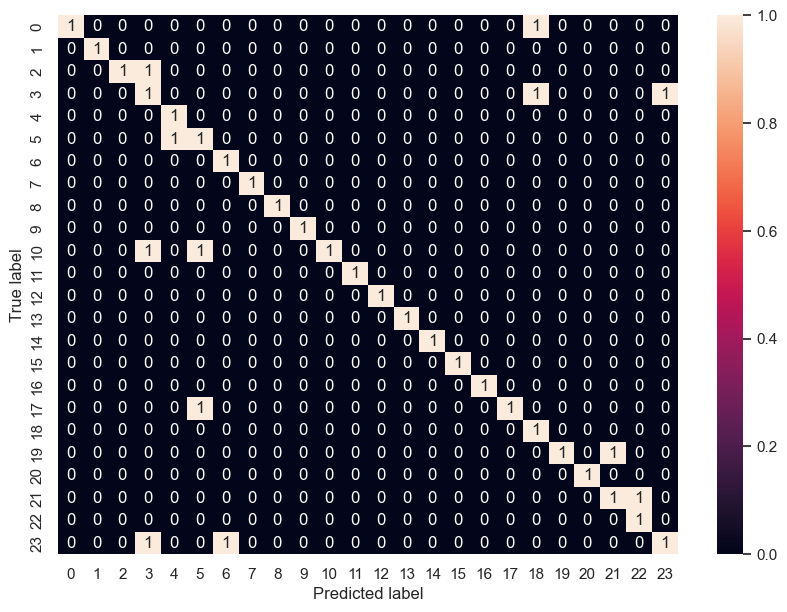

In [35]:
# LOGISTIC REGRESSION
lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)
predictions_lr = lr.predict(tfidf.transform(X_val))
predictions_train = lr.predict(tfidf.transform(X_train))

results_lr = modelEvaluation(predictions_lr, y_val, "logistic Regression")

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) 

			RandomForestClassifier

Accuracy on validation set: 0.9208
Precision on validation set: 0.9295
Recall on validation set: 0.9208
F1_Score on validation set: 0.9190

Classification report : 
                                  precision    recall  f1-score   support

                      Psoriasis       0.90      0.90      0.90        10
                 Varicose Veins       0.71      1.00      0.83        10
           peptic ulcer disease       0.89      0.80      0.84        10
                  drug reaction       0.70      0.70      0.70        10
gastroesophageal reflux disease       1.00      1.00      1.00        10
                        allergy       1.00      0.80      0.89        10
        urinary tract infection       0.90      0.90      0.90        10
                        Malaria       1.00      1.00      1.00        10
                       Jaundice       1.00      1.00      1.00        10
           Cervical spondylosis       1.00      1.00      1.00        10
   

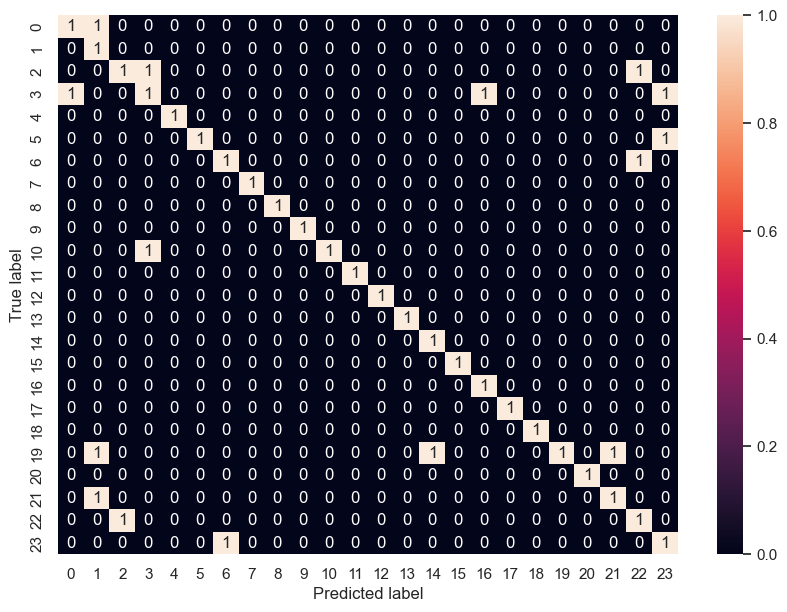

In [36]:
# RANDOM FOREST MODEL
rf = RandomForestClassifier()
rf.fit(x_train_tfidf, y_train)
predictions = rf.predict(tfidf.transform(X_val))
results_rf = modelEvaluation(predictions, y_val, "RandomForestClassifier")

			XGBClassifier

Accuracy on validation set: 0.8625
Precision on validation set: 0.8769
Recall on validation set: 0.8625
F1_Score on validation set: 0.8589

Classification report : 
                                  precision    recall  f1-score   support

                      Psoriasis       0.73      0.80      0.76        10
                 Varicose Veins       0.77      1.00      0.87        10
           peptic ulcer disease       1.00      0.80      0.89        10
                  drug reaction       0.56      0.50      0.53        10
gastroesophageal reflux disease       1.00      0.60      0.75        10
                        allergy       0.75      0.90      0.82        10
        urinary tract infection       0.82      0.90      0.86        10
                        Malaria       1.00      1.00      1.00        10
                       Jaundice       0.82      0.90      0.86        10
           Cervical spondylosis       0.90      0.90      0.90        10
            

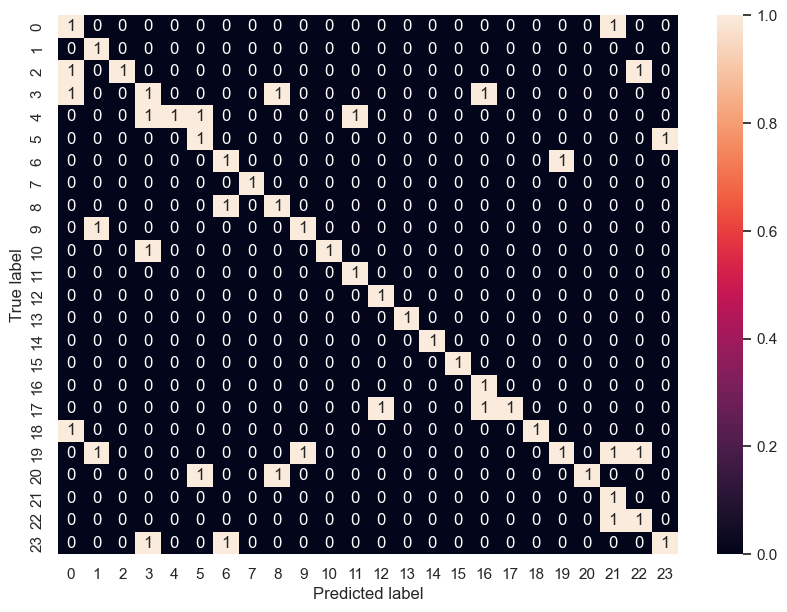

In [37]:
# XGBOOST MODEL
xgb = XGBClassifier()
xgb.fit(x_train_tfidf, y_train)
predictions = xgb.predict(tfidf.transform(X_val))
results_xgb = modelEvaluation(predictions, y_val, "XGBClassifier")

			MultinomialNB

Accuracy on validation set: 0.9333
Precision on validation set: 0.9388
Recall on validation set: 0.9333
F1_Score on validation set: 0.9295

Classification report : 
                                  precision    recall  f1-score   support

                      Psoriasis       1.00      0.90      0.95        10
                 Varicose Veins       1.00      1.00      1.00        10
           peptic ulcer disease       1.00      0.90      0.95        10
                  drug reaction       0.80      0.40      0.53        10
gastroesophageal reflux disease       1.00      1.00      1.00        10
                        allergy       1.00      1.00      1.00        10
        urinary tract infection       1.00      0.90      0.95        10
                        Malaria       1.00      1.00      1.00        10
                       Jaundice       0.77      1.00      0.87        10
           Cervical spondylosis       1.00      1.00      1.00        10
            

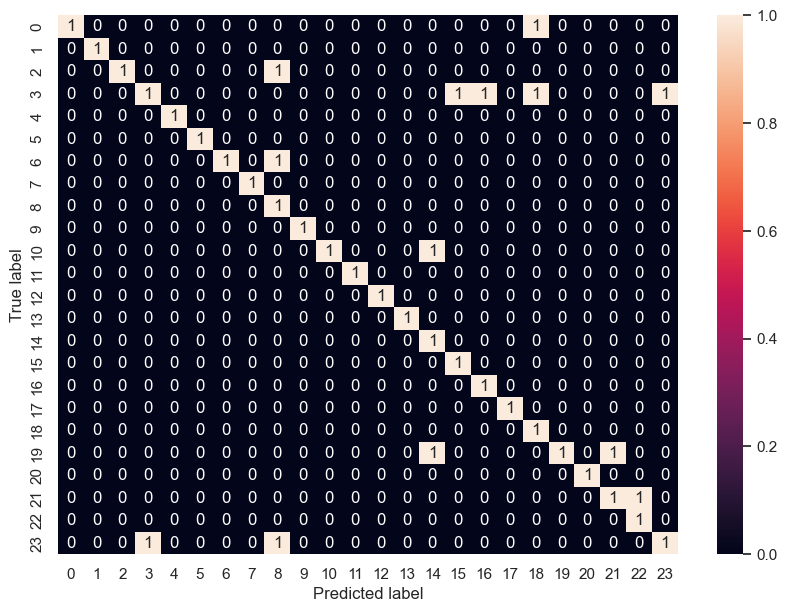

In [38]:
# XGBOOST MODEL
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
predictions = mnb.predict(tfidf.transform(X_val))
results_mnb = modelEvaluation(predictions, y_val, "MultinomialNB")

# **Models Evaluation**

We can now rank our evaluation of all the models to choose the best one for our problem. While both Multinominal Navie Bayes and logistic regression score the same, we choose to use Multinominal Navie Bayes as they correct to their training set. 

In [39]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'LogisticRegression (TF-IDF)' : results_lr,
    'XGBoost (TF-IDF)' : results_xgb,
    'Random Forest (TF-IDF)' : results_rf,
    'Multinominal Navie Bayes (TF-IDF)' : results_mnb,

}
metrics_df = pd.DataFrame(dic)
    
metrics_df1 = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df1.T, headers = 'keys', tablefmt = 'psql'))

+-----------------------------------+------------+-------------+----------+------------+
|                                   |   accuracy |   precision |   recall |   f1-score |
|-----------------------------------+------------+-------------+----------+------------|
| LogisticRegression (TF-IDF)       |   0.9375   |    0.943056 | 0.9375   |   0.937571 |
| XGBoost (TF-IDF)                  |   0.8625   |    0.876859 | 0.8625   |   0.858911 |
| Random Forest (TF-IDF)            |   0.920833 |    0.929488 | 0.920833 |   0.919046 |
| Multinominal Navie Bayes (TF-IDF) |   0.933333 |    0.938766 | 0.933333 |   0.929486 |
+-----------------------------------+------------+-------------+----------+------------+


From above model evaluation table, we can see Multinominal Navie Bayes giving better accuracy as compare to other models.

# **Deep Learning**

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
df.columns

Index(['text', 'label', 'text_len', 'cleaned_text', 'text_label'], dtype='object')

In [42]:
# getting the sentences vector and sentiment values
df1 = df['cleaned_text'].values
label = df['text_label'].values

In [43]:
# Tokenize the data
max_features = 3000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df1)

In [44]:
# Encode the data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(df1)

In [45]:
# Get our training data word index
word_index = tokenizer.word_index
len(word_index)

1101

In [46]:
# Get the vocabulary size
vocab_size = len(tokenizer.word_index) + 1

In [47]:
# Get max sequence length
maxlen = max([len(x) for x in train_sequences])
maxlen

27

In [48]:
# Pad the training sequences
train_padded = pad_sequences(train_sequences, maxlen=maxlen)

In [49]:
print("Shape of Sentences :", train_padded.shape)
print("Shape of Sentiment :", label.shape)

Shape of Sentences : (1200, 27)
Shape of Sentiment : (1200,)


In [50]:
print("\nPadded sequences:\n", train_padded)


Padded sequences:
 [[  0   0   0 ...  76 673 151]
 [  0   0   0 ... 178 674 197]
 [  0   0   0 ... 101 114  46]
 ...
 [  0   0   0 ... 663  42 112]
 [  0   0   0 ... 157 517 157]
 [  0   0   0 ... 221  10 518]]


In [51]:
#split data into training, validation and testing set
X_train, X_temp, y_train, y_temp = train_test_split(train_padded, label, test_size=0.4, random_state=0, stratify=label)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

In [52]:
batch_size = 128
steps_per_epoch = int( np.ceil(X_train.shape[0] / batch_size) )
steps_per_epoch

6

In [53]:
# Get max training sequence length
maxlen = max([len(x) for x in X_train])
maxlen

27

In [54]:
[X_train.shape,X_val.shape]

[(720, 27), (240, 27)]

In [55]:
Y_train = pd.get_dummies(y_train).values
Y_test = pd.get_dummies(y_test).values
Y_val = pd.get_dummies(y_val).values

### Applying Deep learning RNN model Now

In [56]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping

In [57]:
# Define the vocabulary size and embedding dimension
embedding_dim = 100
# Define the number of output classes
num_classes = 24

In [58]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(units=512))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

In [59]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(X_train, keras.utils.to_categorical(y_train, num_classes=num_classes),
                    validation_data=(X_test, keras.utils.to_categorical(y_test, num_classes=num_classes)),
                    epochs=10,callbacks=[early_stop])

Epoch 1/10
23/23 [==============================] - 12s 282ms/step - loss: 3.1506 - accuracy: 0.0931 - val_loss: 3.0465 - val_accuracy: 0.1083
Epoch 2/10
23/23 [==============================] - 6s 252ms/step - loss: 2.9471 - accuracy: 0.1375 - val_loss: 2.6678 - val_accuracy: 0.2167
Epoch 3/10
23/23 [==============================] - 6s 279ms/step - loss: 2.3661 - accuracy: 0.2736 - val_loss: 2.0466 - val_accuracy: 0.4167
Epoch 4/10
23/23 [==============================] - 6s 276ms/step - loss: 1.7487 - accuracy: 0.4250 - val_loss: 1.8415 - val_accuracy: 0.4458
Epoch 5/10
23/23 [==============================] - 5s 230ms/step - loss: 1.2732 - accuracy: 0.5847 - val_loss: 1.3977 - val_accuracy: 0.6333
Epoch 6/10
23/23 [==============================] - 5s 235ms/step - loss: 0.9297 - accuracy: 0.7264 - val_loss: 1.0227 - val_accuracy: 0.6750
Epoch 7/10
23/23 [==============================] - 5s 230ms/step - loss: 0.7129 - accuracy: 0.7736 - val_loss: 0.8813 - val_accuracy: 0.7417
Epoch

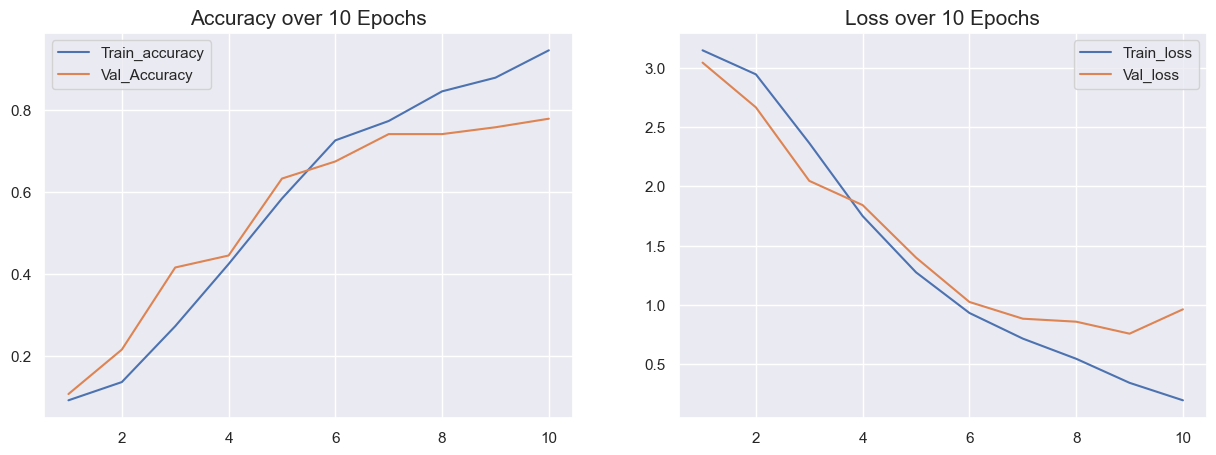

In [61]:
#Plot the accuracy and loss graphs

import matplotlib.pyplot as plt

def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,len(acc)+1), acc, label='Train_accuracy')
    plt.plot(range(1,len(val_acc)+1), val_acc, label='Val_Accuracy')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,len(loss)+1), loss, label='Train_loss')
    plt.plot(range(1,len(val_loss)+1), val_loss, label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_acc_loss(history, 10)

In [62]:
from keras.utils import to_categorical
# One-hot encode the labels
Y_test = to_categorical(y_test, num_classes)

In [63]:
# lets try to evaluate the model on testing data
test_eval = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.9604905247688293
Test accuracy: 0.7791666388511658


In [64]:
# lets try to predict the classes
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1)

dic = {'Psoriasis':0, 
       'Varicose Veins':1, 
       'peptic ulcer disease':2,
       'drug reaction':3,
       'gastroesophageal reflux disease':4, 
       'allergy':5, 
       'urinary tract infection':6,
       'Malaria':7,
       'Jaundice':8, 
       'Cervical spondylosis':9,
       'Migraine':10,
       'Hypertension':11,
       'Bronchial Asthma':12, 
       'Acne':13, 
       'Arthritis':14,
       'Dimorphic Hemorrhoids':15,
       'Pneumonia':16,
       'Common Cold':17,
       'Fungal infection':18,
       'Dengue':19,
       'Impetigo':20, 
       'Chicken pox':21,
       'Typhoid':22, 
       'diabetes':23}
       
target_names = list(dic.keys())
print ("\nClassification report : \n", classification_report(y_test, y_pred, target_names=target_names))

8/8 [==============================] - 2s 85ms/step

Classification report : 
                                  precision    recall  f1-score   support

                      Psoriasis       0.46      0.60      0.52        10
                 Varicose Veins       0.90      0.90      0.90        10
           peptic ulcer disease       0.70      0.70      0.70        10
                  drug reaction       0.67      0.40      0.50        10
gastroesophageal reflux disease       0.73      0.80      0.76        10
                        allergy       0.62      0.50      0.56        10
        urinary tract infection       1.00      0.60      0.75        10
                        Malaria       1.00      0.90      0.95        10
                       Jaundice       0.91      1.00      0.95        10
           Cervical spondylosis       1.00      0.80      0.89        10
                       Migraine       1.00      1.00      1.00        10
                   Hypertension       0.56  

			Deep Learning

Accuracy on validation set: 0.7708
Precision on validation set: 0.7958
Recall on validation set: 0.7708
F1_Score on validation set: 0.7706

Classification report : 
                                  precision    recall  f1-score   support

                      Psoriasis       0.46      0.60      0.52        10
                 Varicose Veins       0.90      0.90      0.90        10
           peptic ulcer disease       0.70      0.70      0.70        10
                  drug reaction       0.67      0.40      0.50        10
gastroesophageal reflux disease       0.73      0.80      0.76        10
                        allergy       0.62      0.50      0.56        10
        urinary tract infection       1.00      0.60      0.75        10
                        Malaria       1.00      0.90      0.95        10
                       Jaundice       0.91      1.00      0.95        10
           Cervical spondylosis       1.00      0.80      0.89        10
            

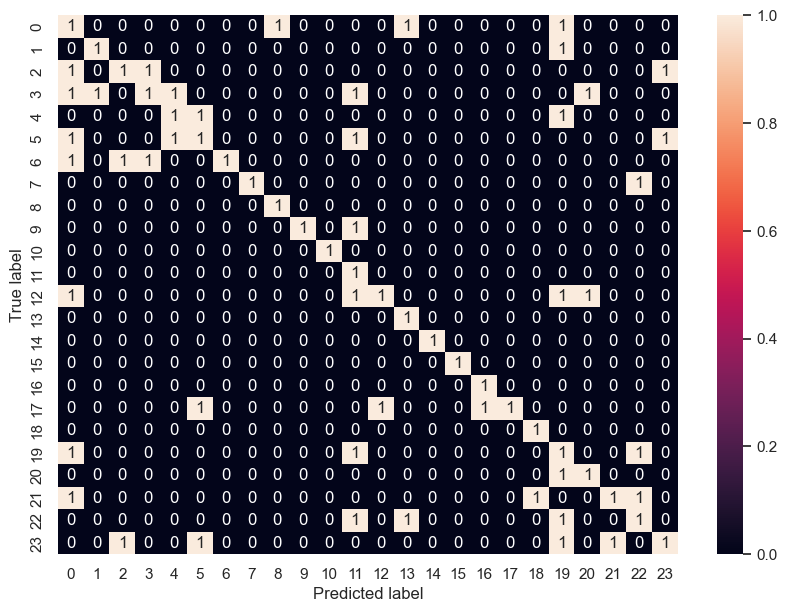

[0.7708333333333334,
 0.7957564426314425,
 0.7708333333333334,
 0.7706420496260146]

In [65]:
modelEvaluation(y_pred, y_test, 'Deep Learning')